# Meet-Up Python Toulouse

October 19th, 2023 


### Datamodel: From Scripts to Applications
Wannes Rombouts


*finish at 2min (2 min)*


**Levez la main si vous codez régulièrement.**  
(metier, études, hobby)

**Baissez la main si:**
- Vous n'avez jamais fait de python du tout
- Vous n'avez jamais fait de python serieusement (metier, études)
- Vous ne vous considérez pas confirmé / senior sur python
- Vous n'avez jamais fait de talk sur python

In [155]:
name = "Wannes Rombouts"
nickname = "wapiflapi"

In [2]:
print(f"Find me at {nickname}.com")
print(f"... and on linkedin as {name}")

Find me at wapiflapi.com
... and on linkedin as Wannes Rombouts


In [3]:
%reset -f 

In [4]:
print(name)

NameError: name 'name' is not defined

*finish at 3min (1 min)*

**Wannes Rombouts**
- Expert Python,
- Consultant, dev, conception, formation, ...
- Je débloque les équipes chez mes clients.

**Explain Jupyter**


# Intro

- Who uses Python?
- What is it used for?

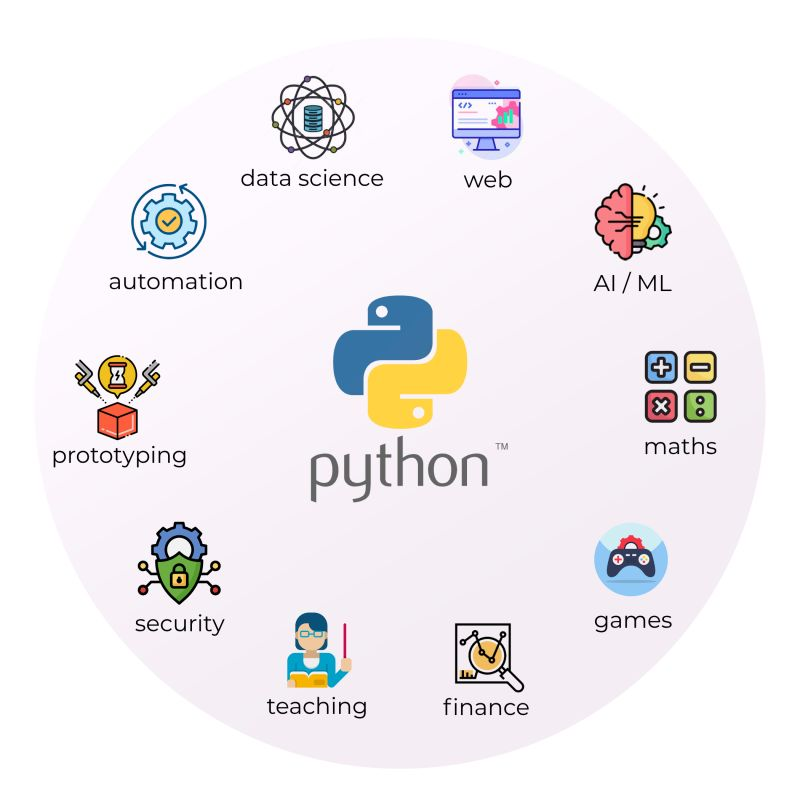



# Low up-front costs

- easy to learn (*)
- easy to run (*)
- easy to read (*)

### But ...

- Who do you ship it to? 
- How long will they use it?
- What happens next?


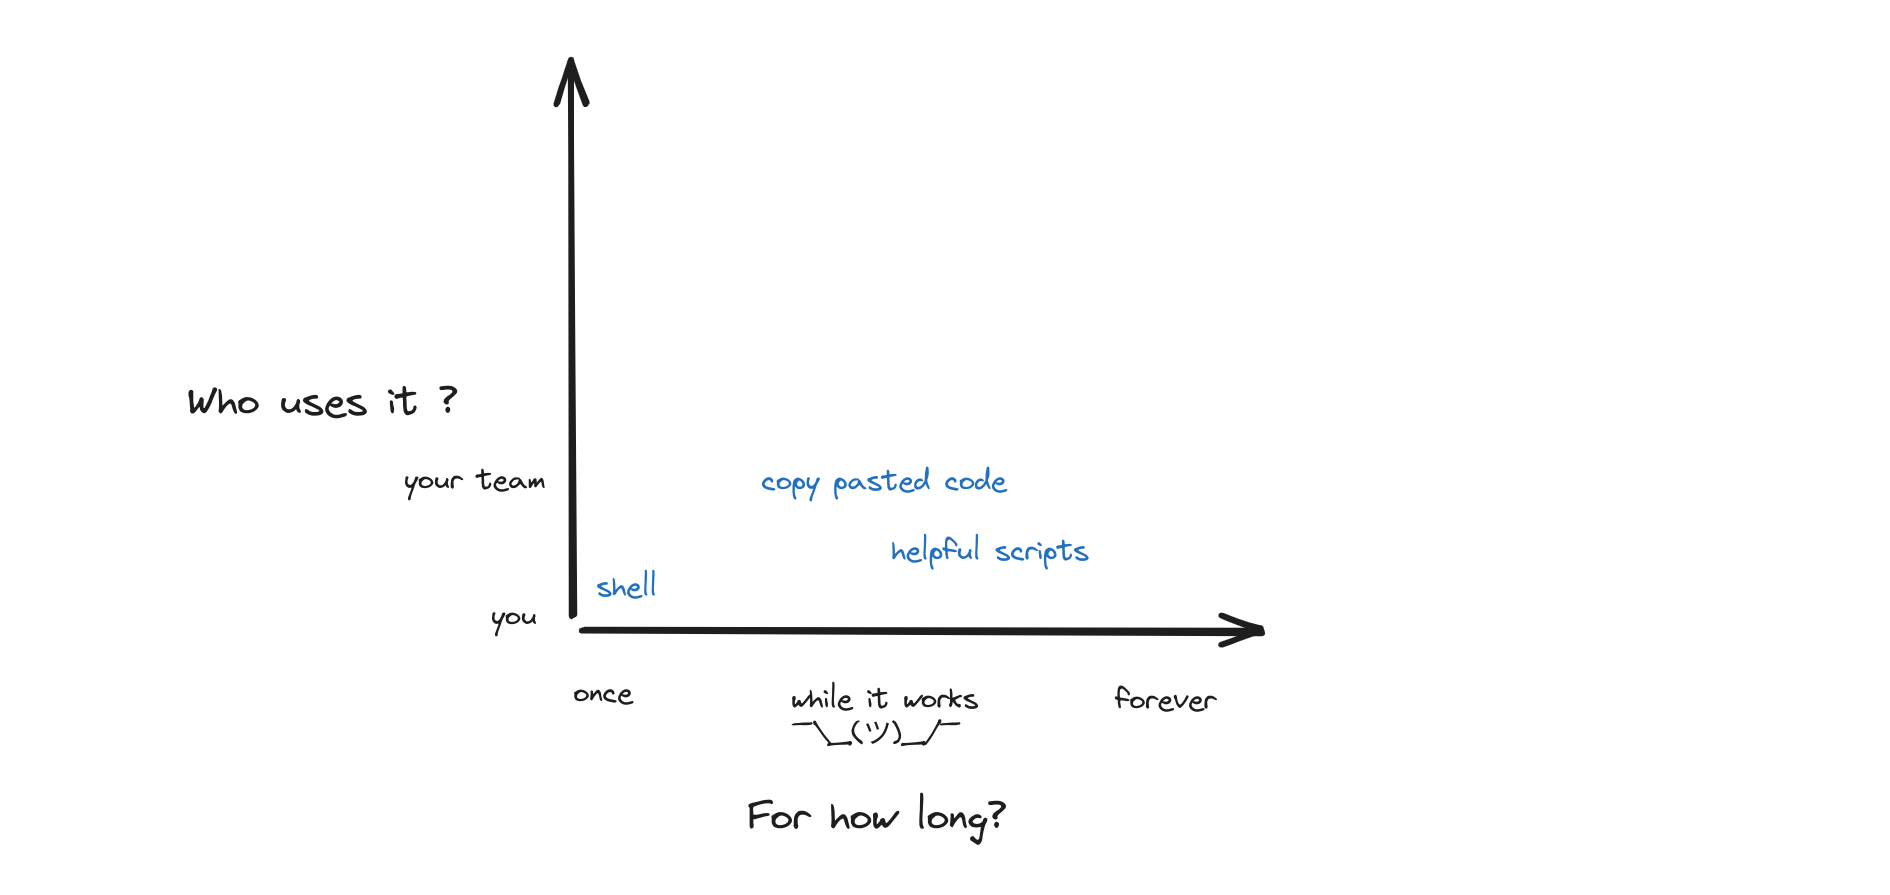

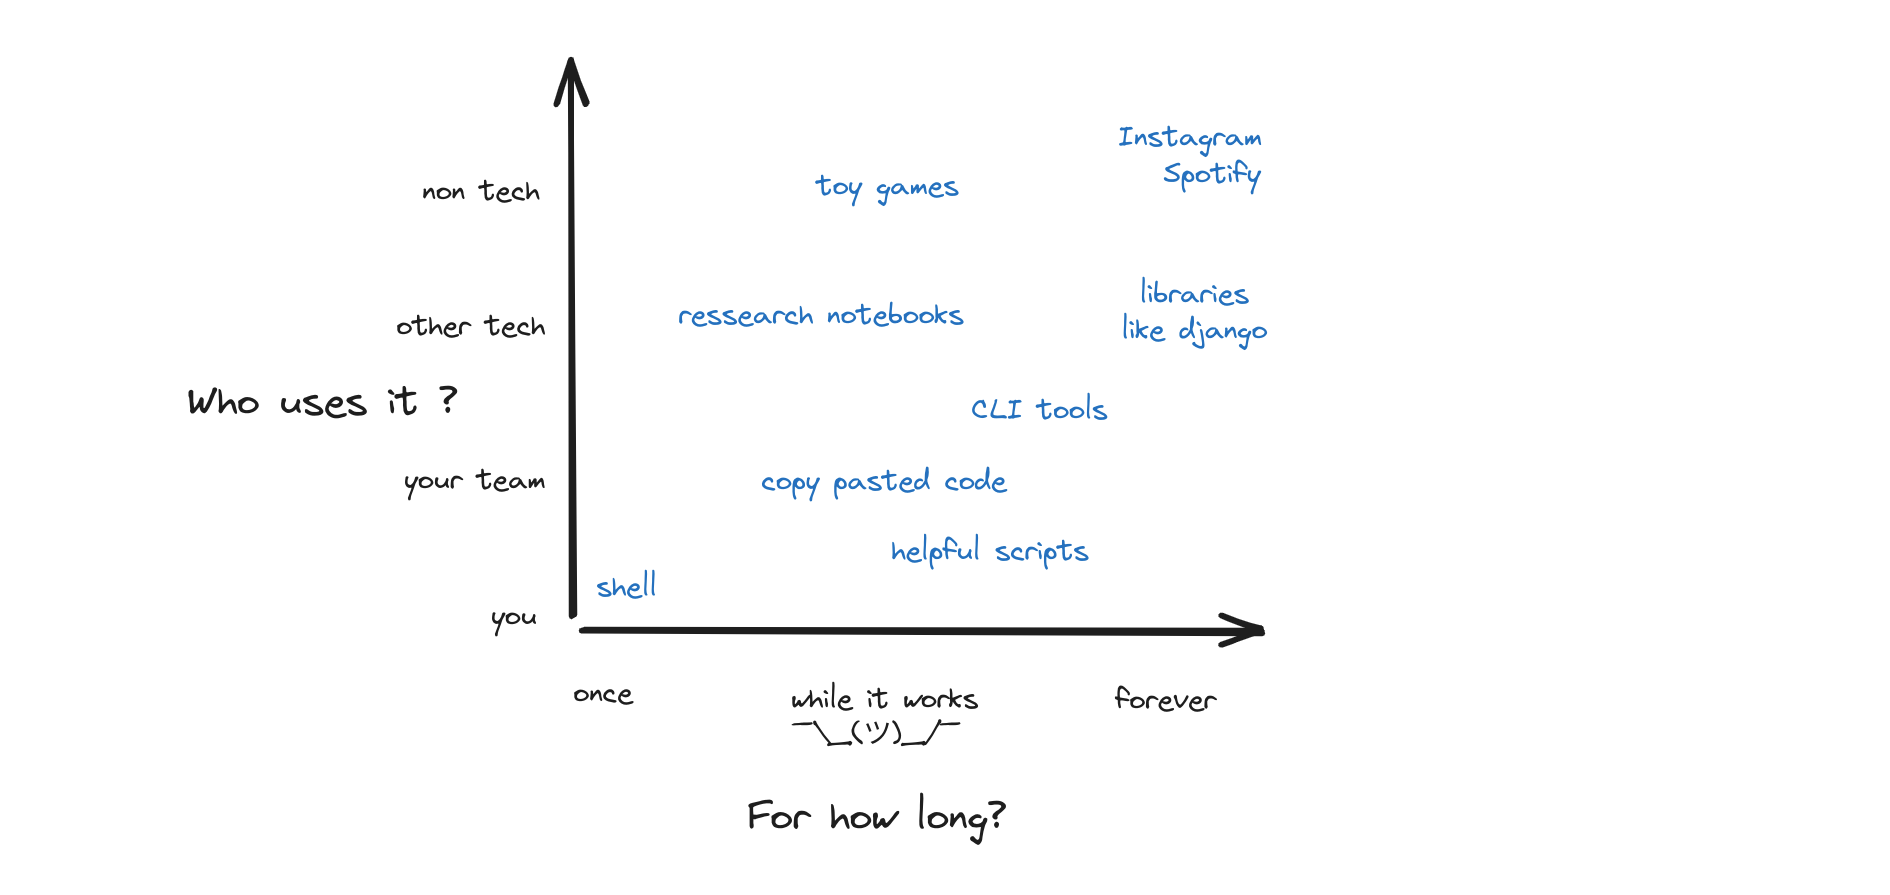

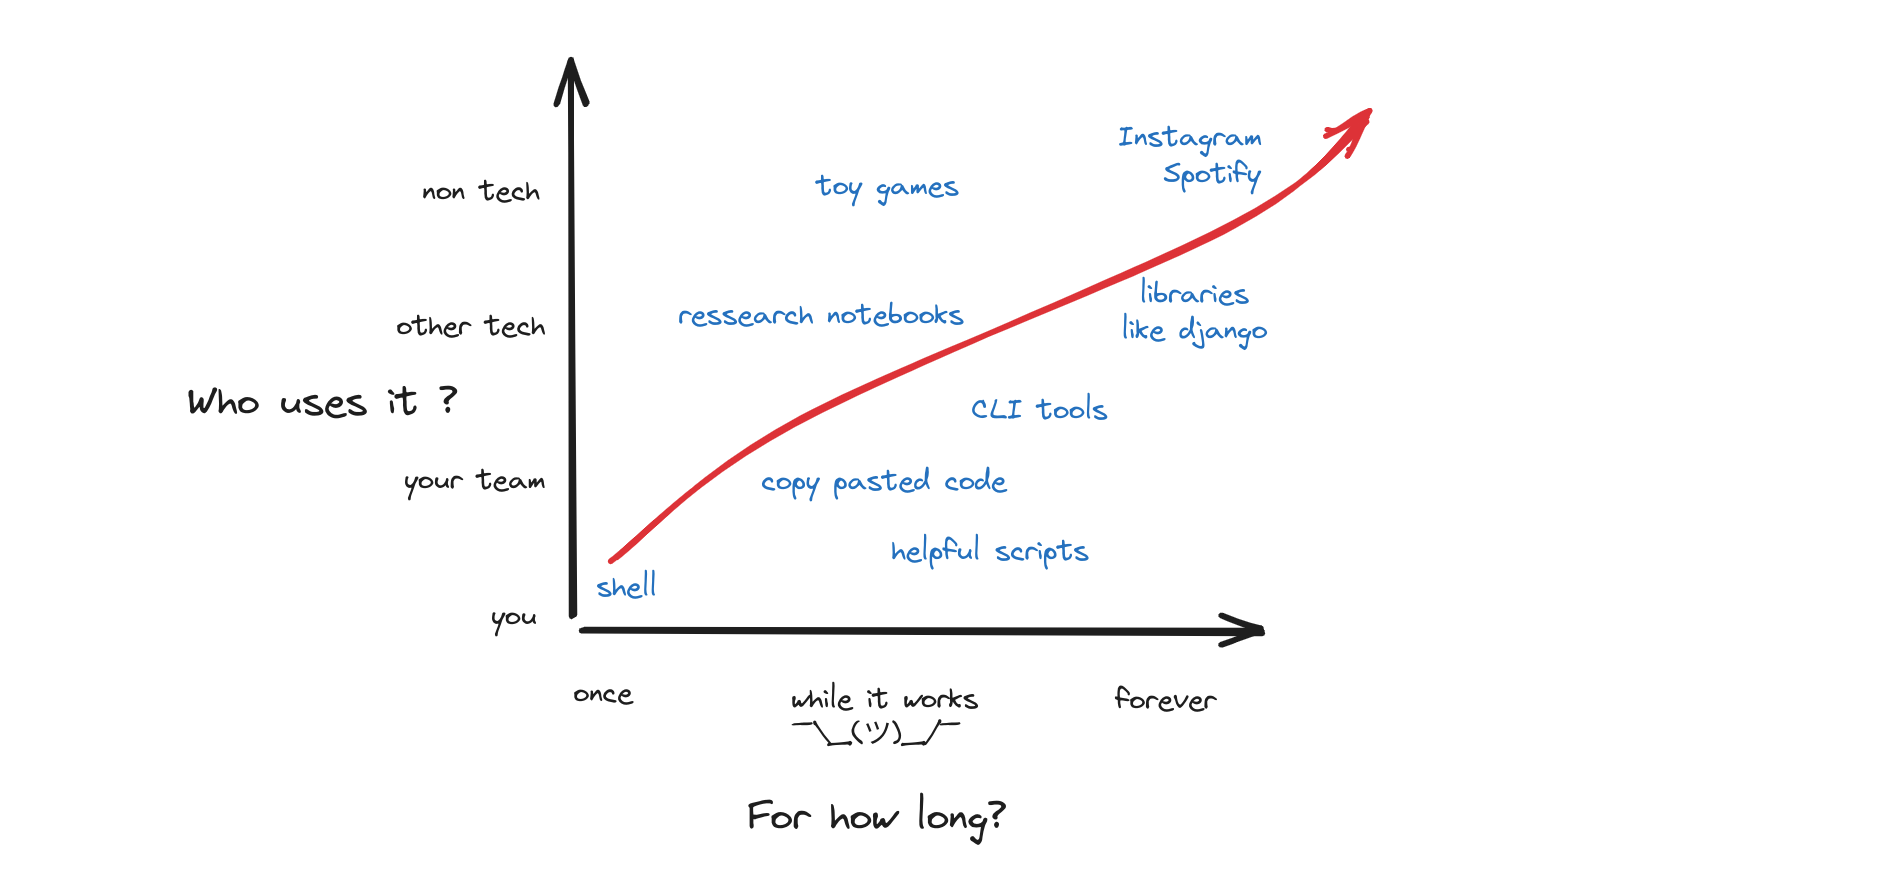

# The path from scripts to applications  


### What tools can help us?

- The language itself (core)
- Frameworks / Tools (python community)
- Architecture / Design (software community)

# What about Python as a Language?

You can write things the simple way:

In [156]:
user = "John"

print(f"Hello {user}!")

Hello John!


And change them _slightly_ when you need to:

In [9]:
class User:
    def __init__(self, name, age=None):
        self.name = name
        self.age = age
    
    def __str__(self):
        return self.name
    
user = User("John")

print(f"Hello {user}!")

Hello John!


**Library code:** defined once, often technical  
**User code:** used in many places, often business logic

User code depends on library code.

In [33]:
# Library code
user = "John"

# User code
print(f"Hello {user}!")

Hello John!


# When building applications:

- Make it as easy as possible to change things
- Minimize the impact of each change on the project


I show "library code" vs. "user code", but it could be:
- different parts of a project
- "business code" vs "platform code".
- "service 1" vs "service 2"



# User code (often) doesn't need to change

In [158]:
# Library code

class User:
    def __init__(self, name, age):
        self.name = name
        self.age = age
    
    def __str__(self):
        return self.name
        
user = User("john", 42)


# User code
print(str(user))



john


- `str()` builtin -> `__str__` method

- `len()` builtin -> `__len__` method
- `iter()` builtin -> `__iter__` method
- ...etc

# Change User Code behavior

The hard part

- metaclasses
- descriptors

The easier part
- decorators
- generators
- context managers

In [36]:
# Library code
class Base:
    
    def foo(self):
        return "foo"

How can user code make sure `Base` has `foo` ?

In [35]:
# User code

assert hasattr(Base, "foo")

class Dependant(Base):
    
    def bar(self):
        return self.foo()

## The other way around ?

How can library code make sure `Dependant` **will have** `bar` ?

In [20]:
# Library code
class Base:
    
    def foo(self):
        return self.bar()

In [21]:
# User code
class Dependant(Base):
    
    def bar(self):
        return "bar"

In [39]:
def f():
    class X:
        pass

In [40]:
import dis
dis.dis(f)

  1           0 RESUME                   0

  2           2 PUSH_NULL
              4 LOAD_BUILD_CLASS
              6 LOAD_CONST               1 (<code object X at 0x7f1e636b8850, file "/tmp/ipykernel_590705/843709770.py", line 2>)
              8 MAKE_FUNCTION            0
             10 LOAD_CONST               2 ('X')
             12 PRECALL                  2
             16 CALL                     2
             26 STORE_FAST               0 (X)
             28 LOAD_CONST               0 (None)
             30 RETURN_VALUE

Disassembly of <code object X at 0x7f1e636b8850, file "/tmp/ipykernel_590705/843709770.py", line 2>:
  2           0 RESUME                   0
              2 LOAD_NAME                0 (__name__)
              4 STORE_NAME               1 (__module__)
              6 LOAD_CONST               0 ('f.<locals>.X')
              8 STORE_NAME               2 (__qualname__)

  3          10 LOAD_CONST               1 (None)
             12 RETURN_VALUE


In [22]:
import builtins

original_build_class = builtins.__build_class__

In [23]:
# Library code
def build_class_hook(func, name, *bases, **kw):
    cls = original_build_class(func, name, *bases, **kw)
    if Base in bases and not hasattr(cls, "bar"):
        raise TypeError("you should have a bar method!")
    return cls

builtins.__build_class__ = build_class_hook

In [24]:
# User code
class Dependant(Base):
    
    def bar(self):
        return "bar"

In [25]:
builtins.__build_class__ = original_build_class

# Metaclasses (the better way)

In [159]:
# Library code

class BaseMeta(type):
    
    def __new__(cls, name, bases, dct):        
        print(f"{cls=}, {name=}, {bases=}")
        print(f"{dct=}")
        if Base in bases and not hasattrttr: 
        return super().__new__(cls, name, bases, dct)

    
class Base(metaclass=BaseMeta):
    
    def foo(self): 
        return self.bar()


cls=<class '__main__.BaseMeta'>, name='Base', bases=()
dct={'__module__': '__main__', '__qualname__': 'Base', 'foo': <function Base.foo at 0x7f4762531940>}


In [21]:
# User code

class Dependant(Base):
    
    def bar(self):
        return "bar"


cls=<class '__main__.BaseMeta'>, name='Dependant', bases=(<class '__main__.Base'>,)
dct={'__module__': '__main__', '__qualname__': 'Dependant', 'bar': <function Dependant.bar at 0x7f1e601ec7c0>}


# Metaclasses

### Enforce things on user code.

Specifically they control how new classes can be created.



#### Uses:
register plugins, check implementations, configuration, etc.

# Descriptors

Something else...

In [160]:
# Library code
class User:
    def __init__(self):
        self.highscore = 0


In [161]:
# User Code
john = User()

john.highscore = 10
john.highscore = 20
john.highscore = 5

print(john.highscore)

5


In [164]:
# Library code
class User:
    def __init__(self):
        self._highscore = 0

    def set_highscore(self, score):
        assert score > self._highscore, "score must be high"
        self._highscore = score

In [165]:
# User Code
john = User()

john.highscore = 10
john.highscore = 20
john.highscore = 5

print(john.highscore)

5


Wait what?!

We have to change user code!

In [27]:
# Starting with our initial code
# What is a "small" modification we can make ?

class User:
    def __init__(self):
        self.highscore = 0

# without touching user code.

In [166]:
class User:
    
    def __init__(self):
        self._highscore = 0

    def get_highscore(self):
        return self._highscore
    
    def set_highscore(self, score):
        assert score > self._highscore, "score must be high"
        self._highscore = score
        
    highscore = property(fget=get_highscore, fset=set_highscore)

In [168]:
# User code
john = User()

john.highscore = 10
john.highscore = 20
john.highscore = 50

# But how does that work ?

In [32]:
# Let's look at what User.highscore actually is:
print(User.__dict__["highscore"])

In [104]:
print(User.__dict__["highscore"].__get__)
print(User.__dict__["highscore"].__set__)

<method-wrapper '__get__' of property object at 0x7efe7d8438d0>
<method-wrapper '__set__' of property object at 0x7efe7d8438d0>


# Let's build our own

In [178]:
class HighscoreProperty:
    
    def __set__(self, user, score):
        assert score > user._highscore, "score must be high"
        user._highscore = score
    
    def __get__(self, user, objtype=None):
        return user._highscore
    

class User:
    
    highscore = HighscoreProperty()
    
    def __init__(self):
        self._highscore = 0
        
user = User()
user.highscore = 10
user.highscore = 5
print(user.highscore)



5


In [37]:
# User code
john = User()

john.highscore = 10
john.highscore = 20
john.highscore = 5

AssertionError: score must be high

# Descriptors

### Enforce things on user code.

Specifically they control how class attributes can be accessed and modified.



#### Uses:
properties, logging, validation, registrations

# If you're curious...

In [183]:
class Foo:
    def add(toto, x, y):
        print("adding in", toto)
        return x + y    

f = Foo()

Foo.add(f, 1, 2)

truc = f.add

truc(1, 2)



adding in <__main__.Foo object at 0x7f4761e4f750>
adding in <__main__.Foo object at 0x7f4761e4f750>


3

In [43]:
def add_function(self, x, y):
    print("adding in", self)
    return x + y 

class Foo:
    add = add_function

f = Foo()
f.add(1, 2)

adding in <__main__.Foo object at 0x7f476279a810>


3

In [190]:

# Functions are descriptors, that's how binding works.
# binding is done by the functions themselves not the class, not "magic".
# Ask me after the talk ;-).

class F:
    @staticmethod
    def __call__(self, x, y):
        print(self)
        return x + y
    
    def __get__(self, obj, **args):
        return lambda x, y: self(obj, x, y)
    
add2 = F()
print(add2(1, 2))

class X:
    add = add2
    
x = X()
x.add(1, 2)


TypeError: F.__call__() missing 1 required positional argument: 'y'

# BREAK TIME.

## Let's do some easier things.

# decorators, generators, context managers


These tell a story :-)


In [65]:
def add(x, y):
    return x + y

print("add", 1, 2, "=", add(1, 2))
print("add", 5, 5, "=", add(5, 5))
print("add", 3, 4, "=", add(1, 2))

add 1 2 = 3
add 5 5 = 10
add 3 4 = 3


In [66]:
def log_add(x, y):
    print("add", x, y, "=", add(x, y))

log_add(1, 2)
log_add(5, 5)
log_add(3, 4)

add 1 2 = 3
add 5 5 = 10
add 3 4 = 7


In [67]:
def sub(x, y):
    return x - y

def log_sub(x, y):
    print("sub", x, y, "=", sub(x, y))
    
log_sub(1, 2)
log_sub(5, 5) 
log_sub(3, 4)

sub 1 2 = -1
sub 5 5 = 0
sub 3 4 = -1


In [68]:
def log(f):

    def f_with_logging(x, y):
        result = f(x, y)
        print(f.__name__, x, y, "=", result)
        return result
    
    return f_with_logging

log_add = log(add)
log_sub = log(sub)

In [69]:
# User code:
add(1, 2)
sub(1, 2)


add 1 2 = 3
sub 1 2 = -1


-1

But we **still** have to change user code...

In [70]:
def add(x, y):
    return x + y

add = log(add)

def sub(x, y):
    return x - y

sub = log(sub)

In [72]:
# User code:
add(1, 2)
sub(1, 2)

add 1 2 = 3
sub 1 2 = -1


-1

In [46]:
def add(x, y):
    return x + y

add = log(add)  # This is a pattern.

In [47]:
@log
def add(x, y):
    return x + y

In [51]:
add = log(add)  # This is a patt ern.

# @Decorators are syntactic suggar

## They do not add anything new

### They just show everything is objects and references.

# Generators

In [73]:
def add(x, y):
    return x + y

isinstance(add, object)

True

In [134]:
class Adder:
    def __call__(self, x, y):
        return x + y
    
add2 = Adder()

In [141]:
print(add(1, 2))
print(add2(1, 2))

3
3


In [88]:
class Adder:
    def __init__(self):
        self.offset = 0
        
    def __call__(self, x, y):
        self.offset += 1
        return self.offset + x + y
    
add3 = Adder()

In [192]:
print(add3(1, 2))
print(add3(1, 2))
print(add3(1, 2))

10
11
12


In [86]:
def count():
    offset = 0
    while True:
        offset += 1
        yield offset

print(count)
        
generator = count()
print(generator)

<function count at 0x7f4762525b20>
<generator object count at 0x7f4761e78040>


In [202]:
print(next(generator))
print(next(generator))
print(next(generator))

31
32
33


`next()` -> `__next__`

In [91]:
class CountGenerator():
    
    def __init__(self):
        self.offset = 0
    
    def __next__(self):
        self.offset += 1
        return self.offset

In [203]:
generator = CountGenerator()

print(next(generator))
print(next(generator))
print(next(generator))

1
2
3


# Generators are lazy

# Generators enforce sequencing

In [96]:
# Library code
class Something:
    
    def do_this_first(self, arg1):
        self.step1 = arg1
        return 1
        
    def do_this_second(self, arg2):
        assert self.step1
        self.step2 = arg2
        return 2
    
    def do_this_last(self, arg3):
        assert self.step2, "I told you to call this last!"
        return 3

In [97]:
# User code
s = Something()

result1 = s.do_this_first(1)

if result1 == 1:  # We like it, continue
    result2 = s.do_this_second(2)
    result3 = s.do_this_last(3)

In [99]:
# User code
s = Something()

# But what ifffff....
result3 = s.do_this_last(1)
result2 = s.do_this_second(2)


AttributeError: 'Something' object has no attribute 'step2'

In [100]:
# Library code
class Something:
    
    def do_this_first(self, arg1):
        self.step1 = arg1
        return 1
        
    def do_this_second(self, arg2):
        assert self.step1
        self.step2 = arg2
        return 2
    
    def do_this_last(self, arg3):
        assert self.step2, "I told you to call this last!"
        return 3

In [113]:
# Library code
def something(arg1, arg2, arg3):
    step1 = arg1
    yield 1
    
    step2 = arg2
    yield 2
    
    assert step2, "this can't break"
    yield 3

In [114]:
s = something(1, 2, 3)

result1 = next(s)
if result1 == 1:  # We like it, continue
    result2 = next(s)
    result3 = next(s)

# Generators enforce sequencing

In [115]:
# User code
s = something(1, 2, 3)  # What if arg2 depends on result1 ?

result1 = next(s)
result2 = next(s)
result3 = next(s)

In [116]:
# User code
s = Something()

result1 = s.do_this_first(1)

# No problem with our methods!
result2 = s.do_this_second(result1 * 2)
result3 = s.do_this_last(10)

In [121]:
# Library code
def something(arg1):
    
    arg2 = yield 1
    
    arg3 = yield 2    

    yield 3

In [122]:
s = something(1)  # only the intial argument

result1 = next(s)
result2 = s.send(result1 * 2)
result3 = s.send("whatever")

# Generators enforce sequencing

## Let's see another example of why that is so useful.

# Context Managers

In [ ]:
with open("Presentation.ipynb") as f:
    print(f.read(100))

In [204]:
# What if we need a temporary working directory ? 
# We want to get back to where we were when we're done !

import os


with working_directory("/tmp/"):
    print(os.getcwd())

/tmp


In [232]:
# with ctx as x:
#     pass

Is (roughly) equivalent to:

In [233]:
# x = ctx.__enter__()
# try:
#     pass
# finally:
#     x.__exit__()

In [205]:
import os

class working_directory:
    def __init__(self, name):
        self.name = name
        
    def __enter__(self):
        self.olddir = os.getcwd()
        os.chdir(self.name)
        
    def __exit__(self, *args, **kwargs):
        os.chdir(self.olddir)  

In [208]:
print(os.getcwd())

with working_directory("/tmp/"):
    print(os.getcwd())

print(os.getcwd())

/home/wapiflapi/Documents/python/talk-path
/tmp
/home/wapiflapi/Documents/python/talk-path


In [126]:
with working_directory("/tmp/"):
    1 / 0

ZeroDivisionError: division by zero

In [135]:
print(os.getcwd())

/home/wapiflapi/Documents/python/talk-path


In [209]:
class working_directory:
    def __init__(self, name):
        self.name = name
    
    # CALL THIS FIRST
    def __enter__(self):
        self.olddir = os.getcwd()
        os.chdir(self.name)

    # CALL THIS LAST
    def __exit__(self, *args, **kwargs):
        os.chdir(self.olddir)

In [137]:
def working_directory_generator(name):
    olddir = os.getcwd()
    os.chdir(name)
    yield
    os.chdir(olddir)

In [210]:
class working_directory:
    def __init__(self, name):
        self.generator = working_directory_generator(name)
        
    def __enter__(self):
        next(self.generator)
        
    def __exit__(self, *args, **kwargs):
        next(self.generator, None)

In [211]:
print(os.getcwd())

with working_directory("/tmp/"):
    print(os.getcwd())

print(os.getcwd())

/home/wapiflapi/Documents/python/talk-path
/tmp
/home/wapiflapi/Documents/python/talk-path


In [ ]:
class working_directory:
    def __init__(self, name):
        self.generator = working_directory_generator(name)
        
    def __enter__(self):
        next(self.generator)
        
    def __exit__(self, *args, **kwargs):
        next(self.generator, None)
        

In [212]:
# Do we have to write the above each time? Can't we automate that?

def contextmanager(generator_function):
    return # Some ContextManager that uses generator_function

In [213]:
def contextmanager(generator_function):

    class ContextManager:        
        def __init__(self, *args, **kwargs):
            self.generator = generator_function(*args, **kwargs)
    
        def __enter__(self):
            next(self.generator)
        
        def __exit__(self, *args, **kwargs):
            next(self.generator, None)
    
    return ContextManager

In [277]:
def working_directory(name):
    olddir = os.getcwd()
    os.chdir(name)
    yield
    os.chdir(olddir)

working_directory = contextmanager(working_directory)

with working_directory("/tmp/"):
    print(os.getcwd())    
    

/tmp


In [145]:
def working_directory(name):
    olddir = os.getcwd()
    os.chdir(name)
    yield
    os.chdir(olddir)

# Isn't this a "pattern"?
working_directory = contextmanager(working_directory)

In [146]:
@contextmanager
def working_directory(name):
    olddir = os.getcwd()
    os.chdir(name)
    try:
        yield # Let the user do something here!
    except:
        pass
    finally:
        os.chdir(olddir)

In [214]:
with working_directory("/tmp/"):
    print(os.getcwd())
    1/0

/tmp


ZeroDivisionError: division by zero

In [150]:
from contextlib import contextmanager

@contextmanager
def working_directory(name):
    olddir = os.getcwd()
    os.chdir(name)
    yield # Let the user do something here!
    os.chdir(olddir)

In [151]:
with working_directory("/tmp/"):
    print(os.getcwd())

/tmp


In [153]:
from contextlib import chdir

with chdir("/tmp/"):
    print(os.getcwd())

/tmp


# Context Managers

### Enforce setup / teardown.

Specifically they make it hard for user code to mess it up.

In [ ]:
# User code

with safe_space():
    do_stuff()

Compare with:

In [ ]:
# User code

setup_safe_space()
try:
    do_stuff()
finally:
    teardown_safe_space()

##  From Scripts to Applications?

# Application CODE has users.
# Script CODE has none.

# You are a user of your code

- When after six months you don't remember how the code works.
- When there is too much code for you to all have it in your head.
- When you're spending time changing the existing code.


## Python, the language, has a lot of tools to help enforce things


### descriptors and metaclasses

- help you enforce things on user code

### generators and context managers

- help you enforce sequencing on user behavior



# These are very technical and fundamental tools.

# You won't need them often!


### Alternatives:

- The standard library (`abc`, `contextlib`, etc)
- Other **Framework / Tools** (which use the fundamental tools we covered)
- Solid **Architecture / Design** knowledge.


### That said...

# Knowing these things exists is helpful.


# Questions?